### importing Modules

In [1]:
import pandas as pd                                        
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loding The Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [4]:
df.isnull().sum() # dataset having much Missing values.

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:>

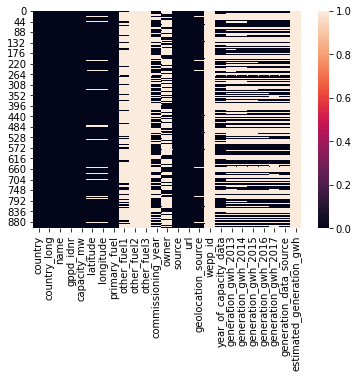

In [5]:
sns.heatmap(df.isnull()) # missing values are more .

### Preprocessing the Dataset

In [6]:
df.capacity_mw.describe()
# basic info of capacity_mw column.so this column while taking as target column that time we need to slove as regression method

count     908.000000
mean      321.046378
std       580.221767
min         0.000000
25%        16.837500
50%        60.000000
75%       388.125000
max      4760.000000
Name: capacity_mw, dtype: float64

In [7]:
df.primary_fuel.describe()
# basic info of primary_fuel column.so this column while taking as target column that time we need to slove as
#classification method.

count      908
unique       8
top       Coal
freq       259
Name: primary_fuel, dtype: object

### first we take primary fuel as target column

In [8]:
df.primary_fuel.value_counts()# Coal amount is more as compare to other primary fuel. 

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear')])

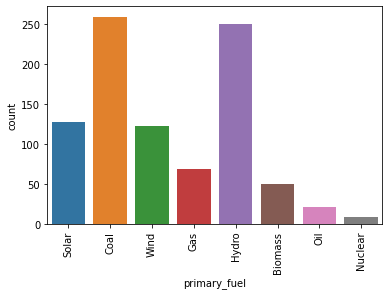

In [9]:
sns.countplot(df.primary_fuel)
plt.xticks(rotation=90)

In [10]:
from sklearn.preprocessing import LabelEncoder # having string data need to convert into numric for further calculations.
lb=LabelEncoder()
df['primary_fuel']=lb.fit_transform(df['primary_fuel'])

In [11]:
df.primary_fuel.value_counts() # convert into numric.

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

### Exploratory Data analysis(EDA)

In [12]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,908.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,3.205947,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,2.281339,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,0.000000,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,1.000000,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,3.000000,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,6.000000,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,7.000000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [13]:
df.drop(columns=['other_fuel3'],inplace=True)
df.drop(columns=['estimated_generation_gwh'],inplace=True)
df.drop(columns=['wepp_id'],inplace=True)

In [14]:
df.generation_data_source.value_counts() # only single data are there.

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='Density'>

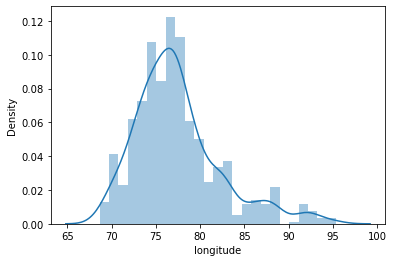

In [15]:
sns.distplot(df.longitude)

In [16]:
df.year_of_capacity_data.value_counts() #This columns not provide direct relation with target column so we drop .

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [17]:
df.drop(columns='year_of_capacity_data',inplace=True)

In [18]:
df.dtypes # object data convert ito missing_

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [19]:
df.country_long.value_counts() # we Drop this column becasuse only one entry is there which is not importat for target column.

India    908
Name: country_long, dtype: int64

<AxesSubplot:xlabel='country_long', ylabel='Count'>

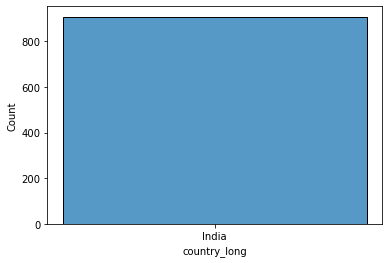

In [20]:
sns.histplot(df.country_long)

In [21]:
df.drop(columns='country_long',inplace=True) # only one entry is there so drop both columns.
df.drop(columns='country',inplace=True)

In [22]:
df.other_fuel1.value_counts() # half od data is missing

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [23]:
df.other_fuel2.value_counts() #Only one entry is there so drop this columns

Oil    1
Name: other_fuel2, dtype: int64

In [24]:
df.drop(columns='other_fuel2',inplace=True) #only oil entry is there so we drop this columns.

capacity_mw               AxesSubplot(0.125,0.816017;0.168478x0.0639831)
latitude               AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
longitude              AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
primary_fuel           AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
commissioning_year        AxesSubplot(0.125,0.739237;0.168478x0.0639831)
generation_gwh_2013    AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
generation_gwh_2014    AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
generation_gwh_2015    AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
generation_gwh_2016       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
generation_gwh_2017    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
dtype: object

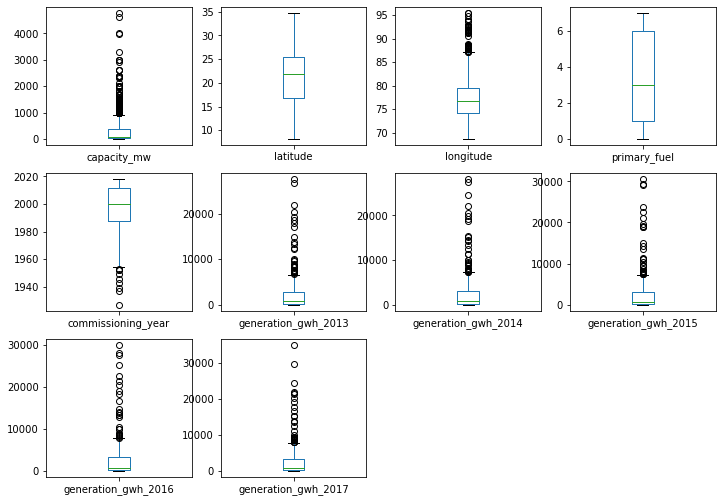

In [25]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(12,30)) #checking Outlier ,some of columns having high  outlier.

In [26]:
#Removing OUtlier
from scipy.stats import zscore 
z=np.abs(zscore(df['capacity_mw']))
z=np.abs(zscore(df['longitude']))
z=np.abs(zscore(df['commissioning_year']))
#z=np.abs(zscore(df['capacity_mw']))
# generation_gwh_2013,2014,2015,2016,2017 having missing values so filling with mean .
#so there is possibility to outlier detection.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

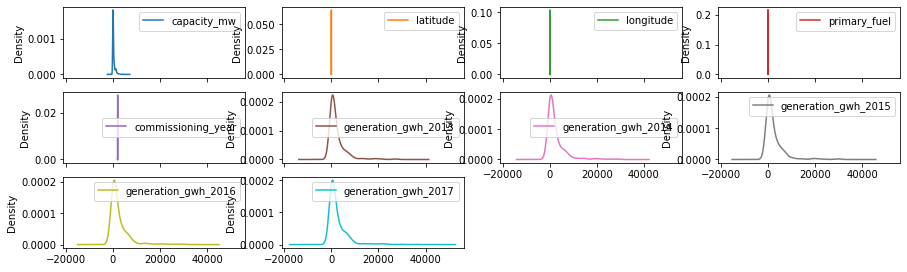

In [27]:
#to check Distribution of skewness, almost there is no skewd data expect fnlwgt column.
df.plot(kind='kde',subplots=True,layout=(4,4),figsize=(15,6)) 

<AxesSubplot:>

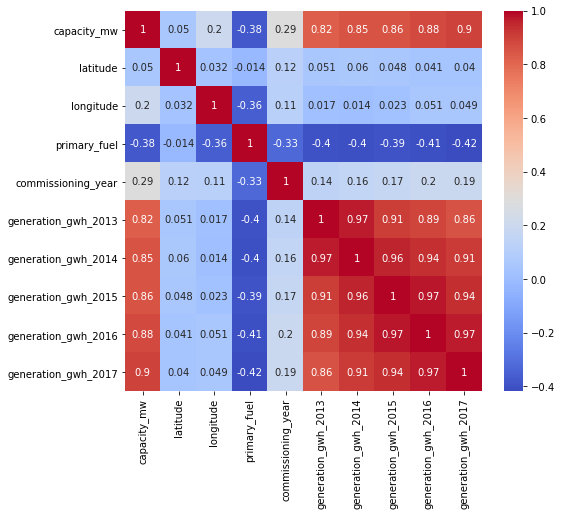

In [28]:
corr=df.corr()
plt.figure(figsize=(8,7))        
sns.heatmap(corr,annot=True,cmap='coolwarm')
# multicolinearity is there so data is imbalance so keeping data aloone we step up towards nest step.

In [29]:
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
primary_fuel           0.471141
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

In [30]:
gain_df=np.sqrt(df['capacity_mw']) # square Trasform
gain_df.skew()

1.4745428885407292

### Encoding the data
Since majority of the classification models need input as ‘int/float’, and do not work on ‘string’ data, 
we encode our categorical columns using ‘Label Encoder’

In [31]:
from sklearn.preprocessing import LabelEncoder # having string data need to convert into numric for further calculations.
lb=LabelEncoder()
#df['country']=lb.fit_transform(df['country'])
df['name']=lb.fit_transform(df['name'])
df['gppd_idnr']=lb.fit_transform(df['gppd_idnr'])
df['other_fuel1']=lb.fit_transform(df['other_fuel1'])
df['owner']=lb.fit_transform(df['owner'])
df['source']=lb.fit_transform(df['source'])
df['url']=lb.fit_transform(df['url'])
df['generation_data_source']=lb.fit_transform(df['generation_data_source'])
df['geolocation_source']=lb.fit_transform(df['geolocation_source'])
#df['']=lb.fit_transform(df[''])

In [32]:
# Filling missing values with mean.
df['commissioning_year']=df['commissioning_year'].replace(np.NaN,df['commissioning_year'].mean())
#df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.NaN,df['year_of_capacity_data'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].replace(np.NaN,df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].replace(np.NaN,df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].replace(np.NaN,df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].replace(np.NaN,df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].replace(np.NaN,df['generation_gwh_2017'].mean())
df['latitude']=df['latitude'].replace(np.NaN,df['latitude'].mean())
df['longitude']=df['longitude'].replace(np.NaN,df['longitude'].mean())

### Data Visualizations

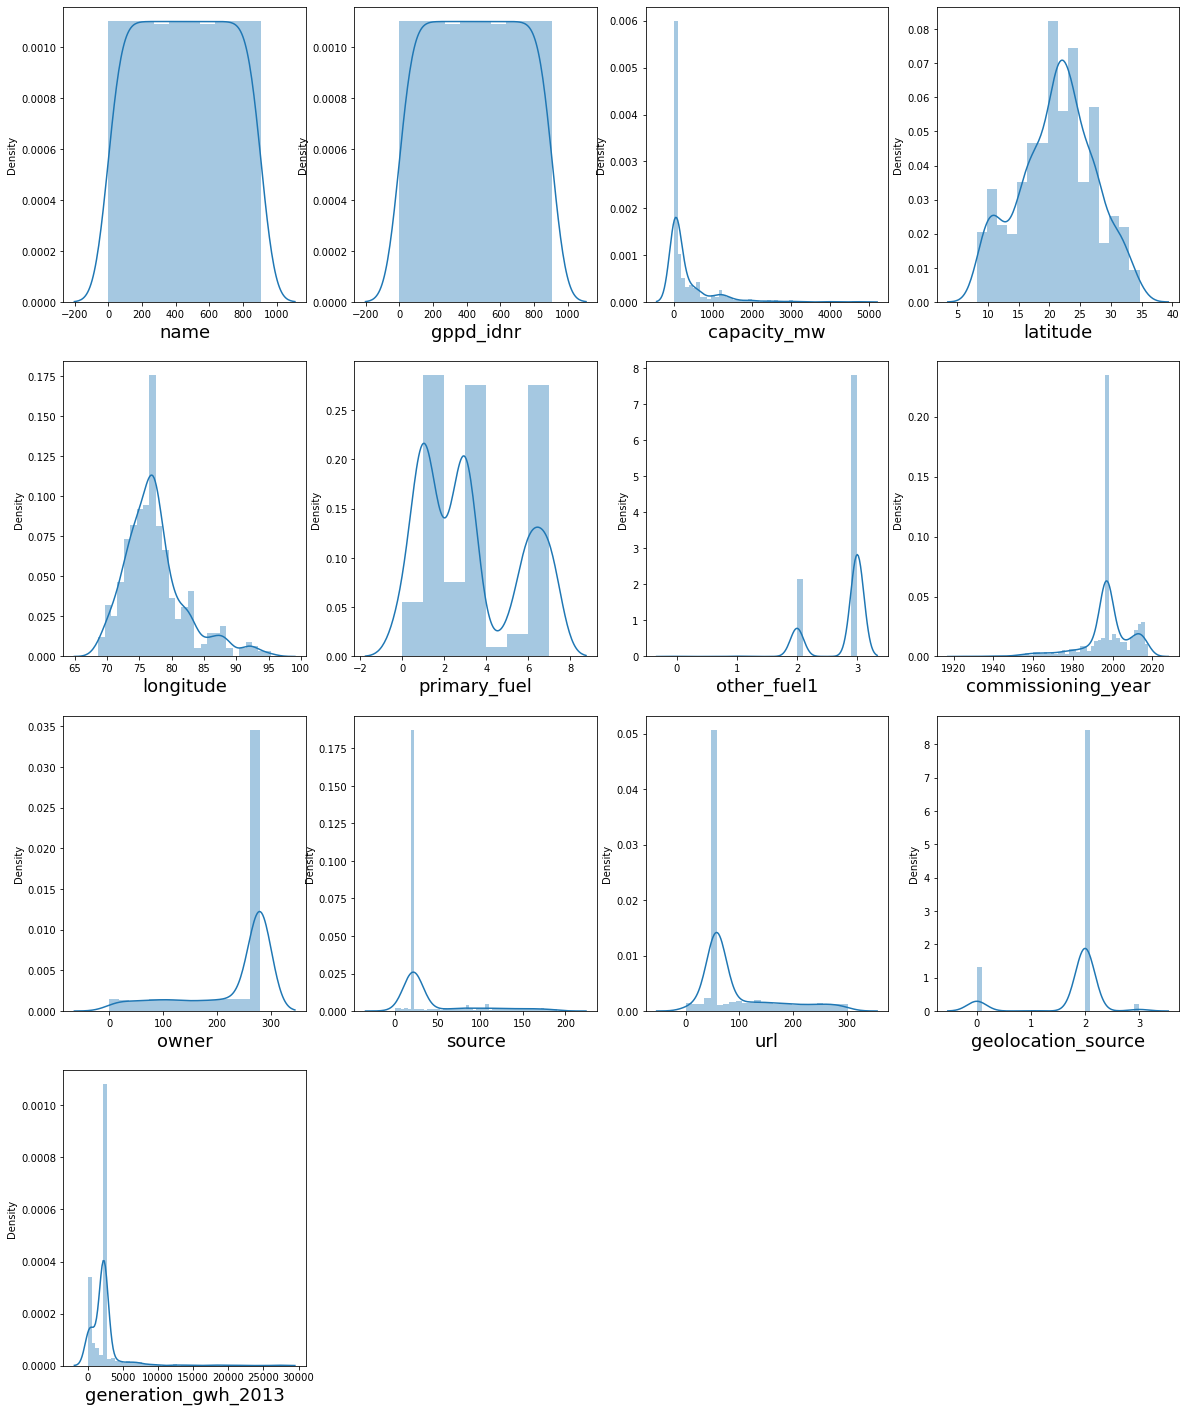

In [33]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
                                    
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'gppd_idnr'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>],
       [<AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'url'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_data_so

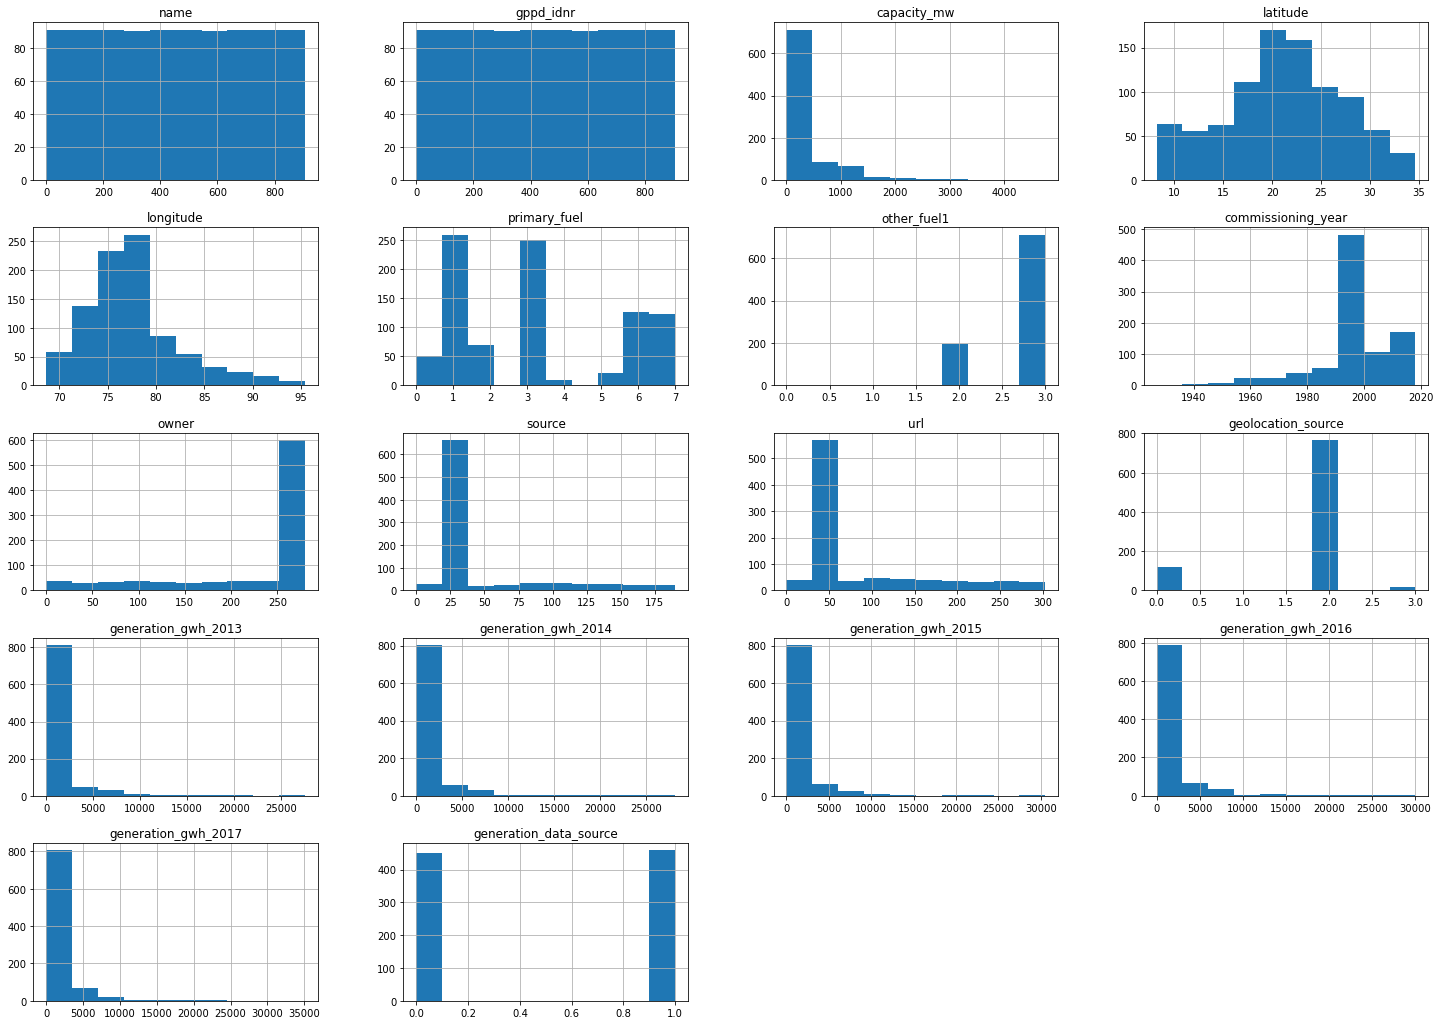

In [34]:
df.hist(figsize=(25,18))

### Train Test Split
     separating the columns into features and target:

### first we take primary fuel as target column and by using classification model we get prediction

In [35]:
# Dividing the dataset into independent and dependent data before scaling
x=df.drop(columns='primary_fuel')
y=df['primary_fuel']

In [36]:
# Importing necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split 

### Fitting data into classification models-
We now proceed to the main step of our machine learning, fitting the model and predicting the outputs.
We fit the data into multiple classification models to compare the performance of all models and select the best model

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

### Find the  beast Random_state use here (currently we are moving shead with Random_state 42)

In [38]:
# Dividing the dataset into independent and dependent data before scaling
x=df.drop(columns='primary_fuel')
y=df['primary_fuel']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=140)

In [39]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(908, 17) (708, 17) (200, 17)
(908,) (708,) (200,)


###  MultinomialNB GridSearchCV ,Cross Validation ,Model Develop 

In [40]:
parameters={'alpha':[1.0],'fit_prior':['bool']}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'alpha': 1.0, 'fit_prior': 'bool'}
0.4533513135550894


In [41]:
mnb=MultinomialNB(alpha=1.0,fit_prior='bool')
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.49
[[12  0  0  0  0  0  1  0]
 [14 17  5  6  6  2  2  0]
 [ 1  1 10  3  1  0  0  0]
 [15  0 32  5  3  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 1  0  3  0  0  1  0  1]
 [ 0  1  0  0  0  0 35  1]
 [ 0  0  0  0  0  0  1 18]]
              precision    recall  f1-score   support

           0       0.28      0.92      0.43        13
           1       0.81      0.33      0.47        52
           2       0.20      0.62      0.30        16
           3       0.36      0.09      0.14        55
           4       0.00      0.00      0.00         2
           5       0.33      0.17      0.22         6
           6       0.90      0.95      0.92        37
           7       0.90      0.95      0.92        19

    accuracy                           0.49       200
   macro avg       0.47      0.50      0.43       200
weighted avg       0.60      0.49      0.48       200



In [42]:
# KFold Cross Validation
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.43406593 0.42857143 0.40659341 0.43093923 0.46961326]
0.4339566510837229
0.020289200576091217


In [43]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    mnb.fit(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random_state:-",i)
        print("Accuracy_Score_train :-",accuracy_score(y_train,pred_train)*100)
        print("Accuracy_Score_test :-",accuracy_score(y_test,pred_test)*100)

At random state 140 The model perform very well
At random_state:- 140
Accuracy_Score_train :- 47.79614325068871
Accuracy_Score_test :- 47.8021978021978
At random state 199 The model perform very well
At random_state:- 199
Accuracy_Score_train :- 47.79614325068871
Accuracy_Score_test :- 47.8021978021978
At random state 292 The model perform very well
At random_state:- 292
Accuracy_Score_train :- 44.490358126721766
Accuracy_Score_test :- 44.505494505494504


### Standard Scaler
The next step is to bring the data to a common scale, since there are certain columns with very small values and some columns
with high values. This process is important as values on a similar scale allow the model to learn better.
We use standard scaler for this process

In [44]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=140)

### Find the  beast Random_state use here ( Random_state 13)

###  DecisionTreeClassifier :Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [45]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                      #DesicisionTreeClassifier having highest score with cross validation 
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'gini'}
0.8612895391900917
0.86


In [46]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.88
[[10  2  1  0  0  0  0  0]
 [ 4 44  2  0  0  2  0  0]
 [ 0  1 10  4  0  1  0  0]
 [ 0  0  3 51  0  1  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  1  1  1  3  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.94      0.85      0.89        52
           2       0.59      0.62      0.61        16
           3       0.91      0.93      0.92        55
           4       0.67      1.00      0.80         2
           5       0.43      0.50      0.46         6
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        19

    accuracy                           0.88       200
   macro avg       0.78      0.83      0.80       200
weighted avg       0.89      0.88      0.88       200



In [47]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7967033  0.82967033 0.8956044  0.85635359 0.8839779 ]
0.8524619027381458
0.0360503980493352


### Support vector Machine Model,Cross Validation ,Hyperparameter Tuning

In [48]:
from sklearn.svm import SVC

parameters={'kernel':['linear','poly','rbf']}
svc=SVC() #(kernel='rbf')

clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'kernel': 'linear'}
0.8714414144441115


In [49]:
# Support Vector classifier
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.82
[[ 4  9  0  0  0  0  0  0]
 [ 3 49  0  0  0  0  0  0]
 [ 0  2  0 14  0  0  0  0]
 [ 0  0  0 55  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  2  0  3  0  1  0  0]
 [ 0  1  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.78      0.94      0.85        52
           2       0.00      0.00      0.00        16
           3       0.74      1.00      0.85        55
           4       0.00      0.00      0.00         2
           5       1.00      0.17      0.29         6
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        19

    accuracy                           0.82       200
   macro avg       0.64      0.55      0.55       200
weighted avg       0.75      0.82      0.77       200



In [50]:
cv_score=cross_val_score(svc,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8227247890231316

###        Random Forest Classifier:Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [51]:
parameters={'n_estimators':[100],'criterion':['gini','entropy']}
rf=RandomForestClassifier()

clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'criterion': 'gini', 'n_estimators': 100}
0.9081909899110979


In [52]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
#rf.RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.89
[[10  3  0  0  0  0  0  0]
 [ 3 47  0  0  0  2  0  0]
 [ 0  1  9  5  0  1  0  0]
 [ 0  0  0 55  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  1  3  1  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        52
           2       0.75      0.56      0.64        16
           3       0.87      1.00      0.93        55
           4       0.00      0.00      0.00         2
           5       0.25      0.17      0.20         6
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        19

    accuracy                           0.89       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.87      0.89      0.88       200



In [53]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89010989 0.92307692 0.91758242 0.90607735 0.91712707]
0.9107947301317466
0.011722967338085742


### Saving Best Model

In [54]:
# We further proceed to test the object that we saved using joblib or pickle, and create a dataframe of predicted values. 
import pickle 
filename='Census_Income.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion:

In [55]:
# Following are the results that we achieve, with an accuracy of 89%.
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_result=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_result

,Original,Predicted
0,6,6
1,3,3
2,1,1
3,7,7
4,3,3
...,...,...
195,2,2
196,6,6
197,1,1
198,1,1


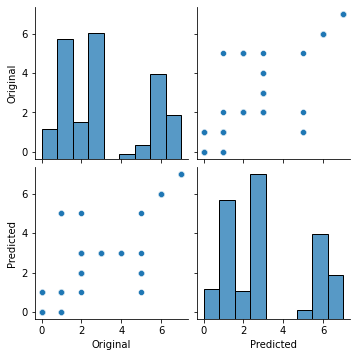

In [56]:
# This marks the end of our process; 
# we have successfully trained our model to predict the income of a person, with an accuracy of ~89%
sns.pairplot(df_result)

### Now we use capacity_mw as a target column to predict data. By using Linear Regression

In [57]:
df['capacity_mw'].describe() # in capacity_mw column there is continous data so we need to use regression model.

count     908.000000
mean      321.046378
std       580.221767
min         0.000000
25%        16.837500
50%        60.000000
75%       388.125000
max      4760.000000
Name: capacity_mw, dtype: float64

In [58]:
# train-test -Split
x=df.drop(columns='capacity_mw')
y=df['capacity_mw']

### Standard Scaler
The next step is to bring the data to a common scale, since there are certain columns with very small values and some columns
with high values. This process is important as values on a similar scale allow the model to learn better.
We use standard scaler for this process

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [61]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [62]:
lr.coef_

array([-2.91158627e-02,  1.52930501e-01, -1.13093735e+00, -7.76814928e+00,
       -2.64816217e+01, -1.04398607e+02,  3.61076371e+00,  3.07453035e-01,
       -7.49117701e-01,  2.01867136e-01, -2.75416659e+01,  2.17618156e-02,
        1.13127880e-02, -3.62641441e-02,  4.48796151e-02,  1.05914489e-01,
       -5.25706418e+02])

In [63]:
lr.intercept_

-6049.364450507614

In [64]:
lr.score(x_train,y_train) #we got Model learning score is very best which is best for further Prediction

0.8536962716842222

In [65]:
pred=lr.predict(x_test)
print(r2_score(y_test,pred))

0.8422056220345849


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

### Regularization:GridSearchCV:Cross Validation Score: Lasso

In [67]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print('Best r2 score:',best_result)

{'alpha': 1, 'random_state': 0}
Best r2 score: 0.8303929789619822


In [68]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8438132465406165

In [69]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.834029250125424

### Regularization:GridSearchCV:Cross Validation Score:-Ridge

In [70]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))} #For Ridge 
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'alpha': 0.0001, 'random_state': 0}
Best R2 Score : 0.8303650199930201


In [71]:
rd=Ridge(alpha=0.01,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
rds

0.8422063786075165

In [72]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8340205292370119

### KNeighborsRegressor : Model,GridSearchCV,Cross Validation Score

In [73]:
parameters={'n_neighbors':[5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}  
knr=KNeighborsRegressor()  

clf=GridSearchCV(knr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best R2 Score : 0.8429335877465574


In [74]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(algorithm='auto',n_neighbors=5,weights='distance')
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_decision=knr.predict(x_test)

kn=r2_score(y_test,pred_decision)
print('R2 Score :',kn*100)

krscore=cross_val_score(knr,x,y,cv=5)
kns=krscore.mean()
print("Cross val Score :",kns*100)

R2 Score : 81.59254027711201
Cross val Score : 82.56222866953074


### Support Vector Regression:Model,GridSearchCV,Cross Validation Score

In [75]:
from sklearn.svm import SVR

svr=SVR(kernel='linear',gamma='auto')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_decision=svr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

R2 Score : 79.05065980646332


### RandomForestRegressor: Model,GridSearchCV,Cross Validation Score

In [76]:
from sklearn.ensemble import RandomForestRegressor

parameters={'n_estimators':[100],'max_features':['auto','sqrt','log2']}

rfr=RandomForestRegressor() 

clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'max_features': 'sqrt', 'n_estimators': 100}
Best R2 Score : 0.860675890067429


In [77]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=100,max_features='log2')
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rftscore=cross_val_score(rfr,x,y,cv=5)
rfc=rftscore.mean()
print("Cross val Score :",rfc*100)

R2 Score : 85.16254319989895
Cross val Score : 84.76277467499325


### Saving Model

In [78]:
import pickle 
filename='Global_Power_Plant.pkl'
pickle.dump(rfr,open(filename,'wb'))

### Conclusion:

In [79]:
loaded_model=pickle.load(open('Global_Power_Plant.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8516254319989895


In [80]:
# Following are the results that we achieve, with an accuracy of 85%.
import numpy as np
a=np.array(y_test)
predicted=np.array(rfr.predict(x_test))
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,40.0,46.8100
1,1.5,46.6710
2,1050.0,1236.5820
3,90.0,181.1275
4,4.0,11.1565
...,...,...
177,100.0,96.7755
178,150.0,106.3210
179,28.2,14.9310
180,11.2,11.6370


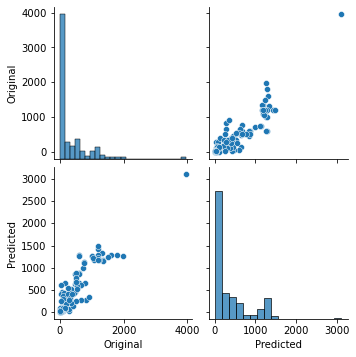

In [81]:
# This marks the end of our process
# we have successfully trained our model to predict the income of a person, with an accuracy of ~85%
sns.pairplot(df)
